In [2]:
pip install wordcloud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image

In [2]:
#Read in Dataframe
df=pd.read_csv("Chicago_Crimes_2012_to_2017.csv")

In [3]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


## Convert dates to pandas datetime format

In [4]:
df.Date=pd.to_datetime(df.Date,format='%m/%d/%Y %I:%M:%S %p')

# setting the index to be  the date will help us a lot later on 

In [5]:
df.index=pd.DatetimeIndex(df.Date)
df.head(3)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
2016-05-03 21:40:00,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2016-05-03 23:31:00,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"


In [7]:
df['time_hour']=df['Date'].apply(lambda x:x.hour)
df['month']=df['Date'].apply(lambda x:x.month)
df['year']=df['Date'].apply(lambda x:x.year)


In [8]:
#remove 2017 data as it only contains 1 month worth of data
#which may mess up annual numbers
df=df[df['year']!=2017]

In [9]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,time_hour,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",23,5,2016
2016-05-03 21:40:00,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",21,5,2016
2016-05-03 23:31:00,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",23,5,2016
2016-05-03 22:10:00,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",22,5,2016
2016-05-03 22:00:00,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",22,5,2016


# 1. analysing most frequent crime codes

In [31]:
#join together a single string of IUCR codes
crime_type_code=''.join(crime for crime in df['IUCR'])
#create and generate a word cloud image
crime_code_wordcloud=WordCloud().generate(crime_type_code)

#plot wordcloud image
plt.figure(figsize=[20,20])
plt.imshow(crime_code_wordcloud,interpolation='bilinear')
plt.axis('off')
#store file 
plt.savefig('us_wine.png', format ='png')
plt.show()

NameError: name 'WordCloud' is not defined

In [16]:
### crime codes
#https://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e/data

In [17]:
#drop NAN values in["Block"] clomn
df_wordcloud=df.copy()
df_wordcloud.dropna(axis=0,subset=["Block"], inplace=True)

In [ ]:
#Creates d=string of block codes and USA flag image mask
create_types_location=" ".join(crime for crime in df_wordcloud["Block"])
mask=np.array(Image.open("us.png"))

#create anf generate a word cloud image
crime_location_wordcloud=WordCloud(background_color="white", mode"RGBA",
                                  max_words=1000, mask=mask).generate(crime_type_location)
#creating coloring from image and plot wordcloud
image_colors=ImageColorGenerator(Mask)


plt.figure(figsize=[20,20])
plt.imshow(crime_code_wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
plt.axis('off')

#store file 
plt.savefig('img/us_wine.png', format ='png')
plt.show()


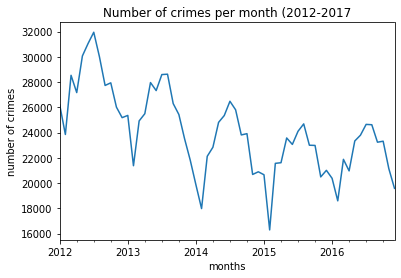

In [11]:
#resampling time series by months
df.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2012-2017')
plt.xlabel("months")
plt.ylabel('number of crimes')
plt.show()

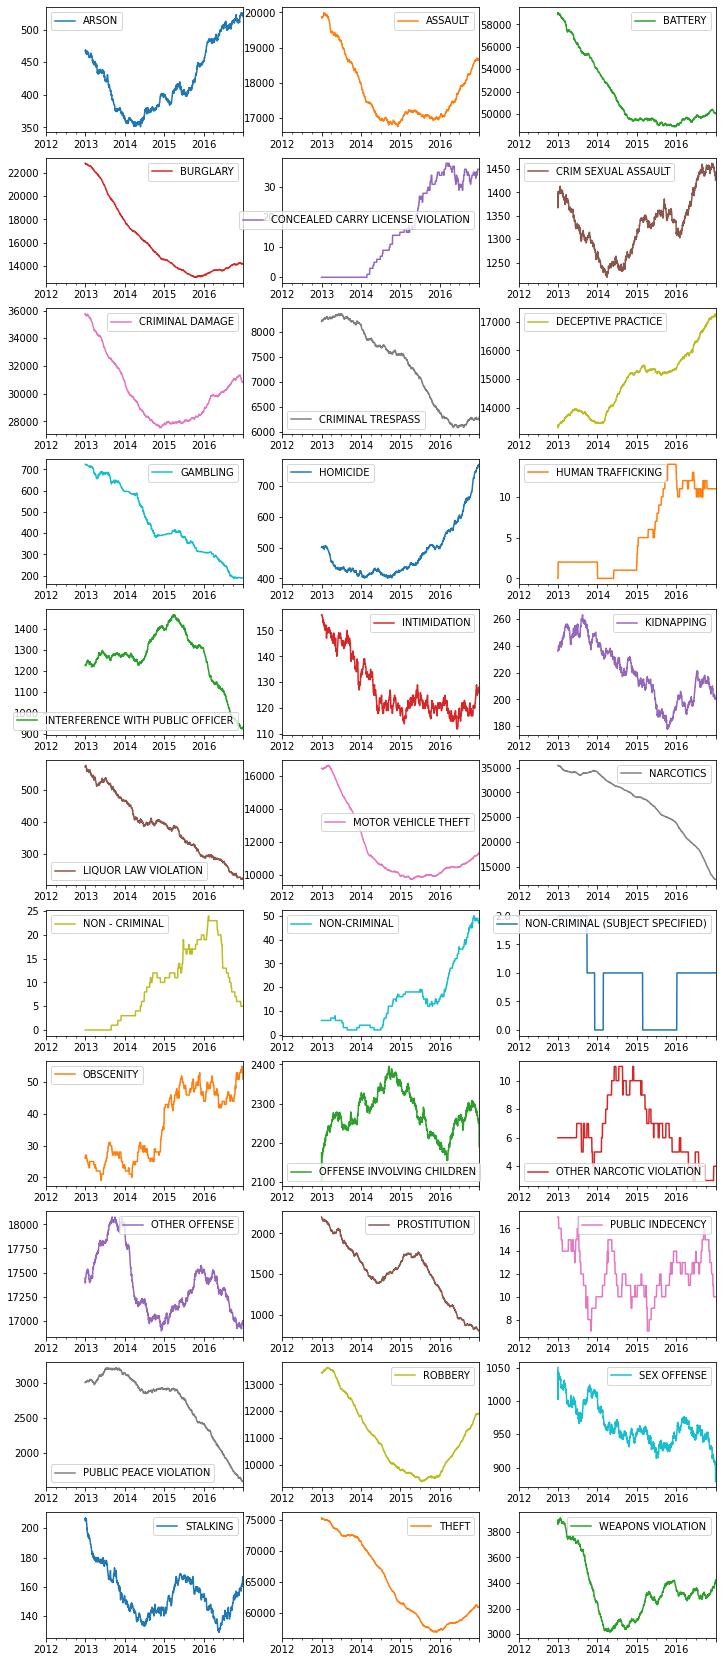

In [19]:
crimes_count_date=df.pivot_table('ID',aggfunc=np.size,columns='Primary Type',
                               index=df.index.date,fill_value=0)
crimes_count_date.index=pd.DatetimeIndex(crimes_count_date.index)
plot=crimes_count_date.rolling(365).sum().plot(figsize=(12,30),subplots=True,layout=(-1,3),sharex=False, sharey=False)


# 4.1 Hourly CRIME TREND ANALYSIS

Text(0.5, 1.0, 'Total crimes by time period')

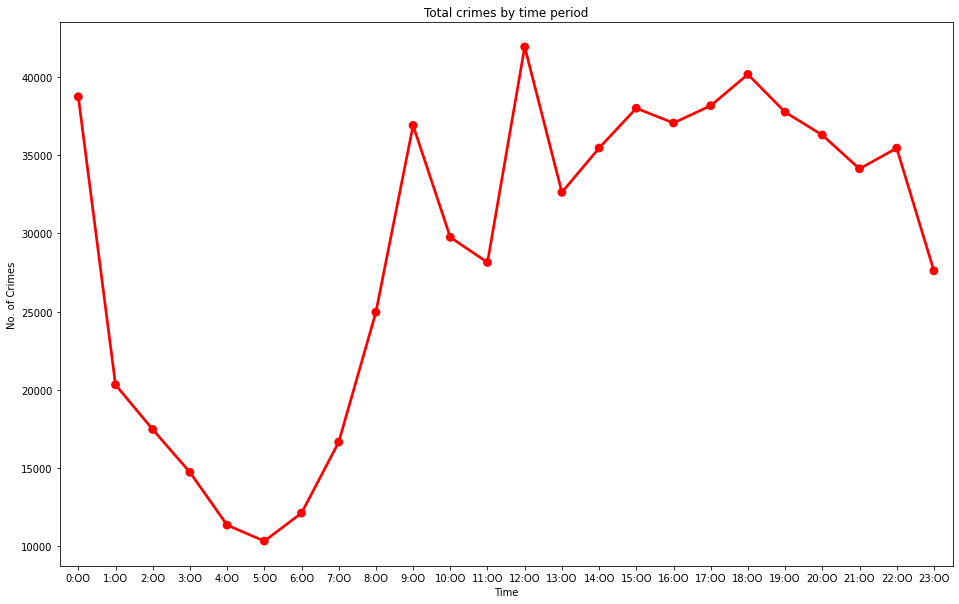

In [29]:
crimes_by_time=df.copy()
#print(crimes_by_time.columns)
#Define our importan top 10 crime type
primary_type=['ARSON', 'CONCEALED CARRY', 'SEXUAL ASSAULT', 'OBSCENITY', 'DECEPTIVE PRACTICE', 
               'HOMICIDE', 'NON-CRIMINAL', 'ROBBERY', 'THEFT', 'WEAPONS VIOLATION', 'CRIMINAL DAMAGE',
                   'MOTOR VEHICLE THEFT', 'HUMAN TRAFFICKING', 'STALKING']
#filter out rows with only the top  10 crimes mentioned above
crimes_by_time=crimes_by_time[crimes_by_time['Primary Type'].isin(primary_type)]

#group crimes by time hour  
crimes_by_time=crimes_by_time.groupby('time_hour').size().reset_index(name='No. of Crimes')

crimes_by_time['hours']=crimes_by_time['time_hour'].apply(lambda x:str(x)+':OO')
#print(crimes_by_time) 
#plot crimes by times period 
fig=plt.figure(figsize=(16,10))
sns.pointplot(data=crimes_by_time,x="hours",y="No. of Crimes",color="red")

#set labes and title

plt.xlabel('Time')
plt.ylabel('No. of Crimes')
plt.title('Total crimes by time period')

# 4.2 MONTHLY CRIME TREND ANALYSIS

Text(0.5, 1.0, 'Avg no. of crimes by month')

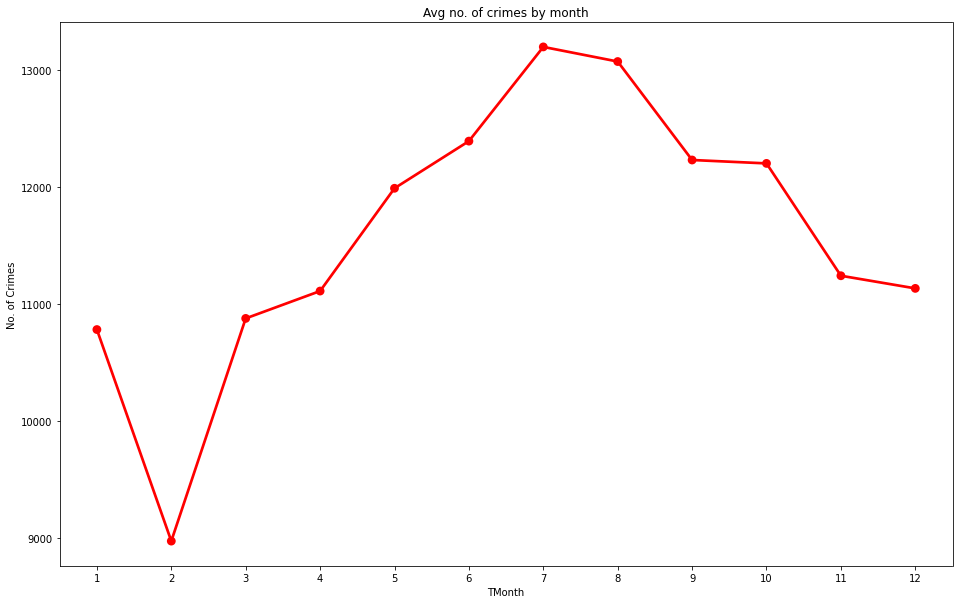

In [30]:
crimes_by_month=df.copy()
#print(crimes_by_month.columns)
crimes_by_month=crimes_by_month[crimes_by_month['Primary Type'].isin(primary_type)]
crimes_by_month=crimes_by_month.groupby('month').size().reset_index(name='No. of Crimes')
#divide each monthly total by 5 yrs to get the avg crime count
crimes_by_month['month(average)']=crimes_by_month['No. of Crimes'].apply(lambda x:x/5)


 
#plot crimes by times period 
fig=plt.figure(figsize=(16,10))
sns.pointplot(data=crimes_by_month,x="month",y="month(average)",color="red")

#set labes and title

plt.xlabel('TMonth')
plt.ylabel('No. of Crimes')
plt.title('Avg no. of crimes by month')

# 5.  RATIO OF CRIME ARREST BASED ON CRIME TYPES

Text(0.5, 1.0, 'No. of Crimes by Type')

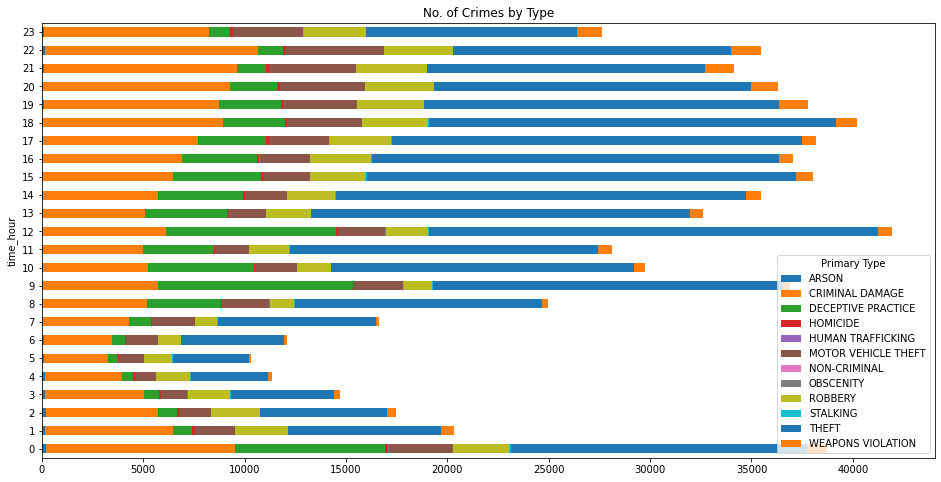

In [22]:

#Group Crimes by type
crimes_by_type=df.copy()
#print(crimes_by_type.columns)
crimes_by_type=crimes_by_type[crimes_by_type['Primary Type'].isin(primary_type)]
crimes_by_type=crimes_by_type.groupby(['time_hour','Primary Type']).size().reset_index(name='No. of Crimes')

#format hour data
crimes_by_type['hours']=crimes_by_type['time_hour'].apply(lambda x:str(x)+':OO')

# Create Crime type Pivot table 

crimes_by_type_pivot=pd.pivot_table(crimes_by_type,index=['time_hour'],columns=['Primary Type'],
                                 values='No. of Crimes',aggfunc=np.sum)

#plot stacked bar chart of crime types,compared hourly
crimes_by_type_pivot.plot(kind='barh',stacked=True,figsize=(16,8))
plt.title("No. of Crimes by Type")

# 5. RATIO OF CRIME ARREST BASED ON CRIME TYPES

Text(0.5, 1.0, 'No. of Crimes by Type')

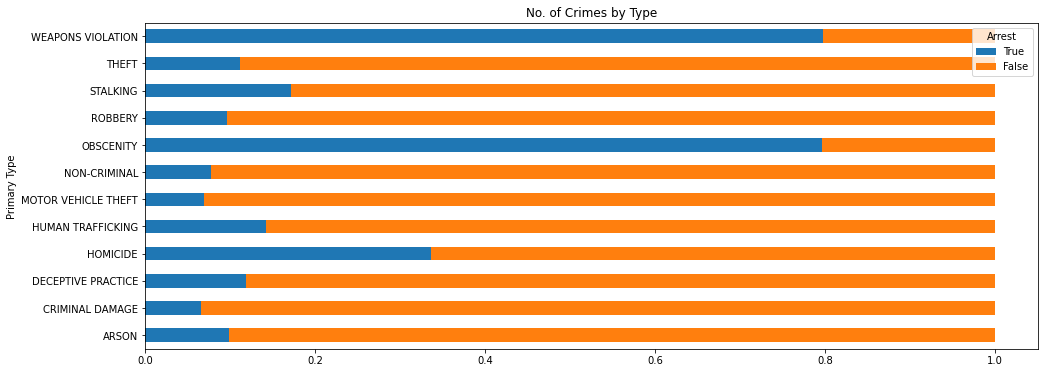

In [17]:
# Group by crine primary types and arrest

crimes_by_arrest=df.copy()
crimes_by_arrest= crimes_by_arrest.groupby (['Primary Type', 'Arrest']).size().reset_index(name='No. of Crime')
#Filter for top 10 primary types mentioned earlier
crimes_by_arrest=crimes_by_arrest[crimes_by_arrest['Primary Type'].isin(primary_type)]

#create pivot table
crimes_by_arrest_pivot=pd.pivot_table(crimes_by_arrest,index=['Primary Type'],
                                     columns=['Arrest'], values="No. of Crime",aggfunc=np.sum)

crimes_by_arrest_pivot=crimes_by_arrest_pivot.reset_index()

#create new column in pivot table :["Total no."],["True"],["False"]
crimes_by_arrest_pivot['Total No']=crimes_by_arrest_pivot[True]+crimes_by_arrest_pivot[False]
crimes_by_arrest_pivot['True']=crimes_by_arrest_pivot[True]/crimes_by_arrest_pivot['Total No']
crimes_by_arrest_pivot['False']=crimes_by_arrest_pivot[False]/crimes_by_arrest_pivot['Total No']

crimes_by_arrest_pivot=crimes_by_arrest_pivot[['Primary Type', 'True','False']]
crimes_by_arrest_pivot=crimes_by_arrest_pivot.set_index('Primary Type')

#plot stacked bar chart of arrest success for the 10 diff crimes
crimes_by_arrest_pivot.plot(kind='barh',stacked=True,figsize=(16,6))
plt.title("No. of Crimes by Type")


# 6. MAJOR CRIMES MONTHLY ARREST ANALYSIS

In [24]:
#concatenate ['Primary Types'] &['Description'] together to make a nwe column
df['Details']= df['Primary Type'] + ', '+ df['Description']

#Group by Crime details and show top 10 crimes with highest arrest rate
top_crimes=df.groupby(['Details'])['Arrest'].count()
top_crimes=pd.DataFrame(top_crimes).nlargest(10,'Arrest').reset_index()
top_crimes=list(top_crimes['Details'])
top_crimes

['THEFT, $500 AND UNDER',
 'BATTERY, DOMESTIC BATTERY SIMPLE',
 'BATTERY, SIMPLE',
 'THEFT, OVER $500',
 'CRIMINAL DAMAGE, TO VEHICLE',
 'CRIMINAL DAMAGE, TO PROPERTY',
 'ASSAULT, SIMPLE',
 'NARCOTICS, POSS: CANNABIS 30GMS OR LESS',
 'BURGLARY, FORCIBLE ENTRY',
 'MOTOR VEHICLE THEFT, AUTOMOBILE']

<AxesSubplot:title={'center':'Major crimes (january- December)'}, xlabel='month', ylabel='Details'>

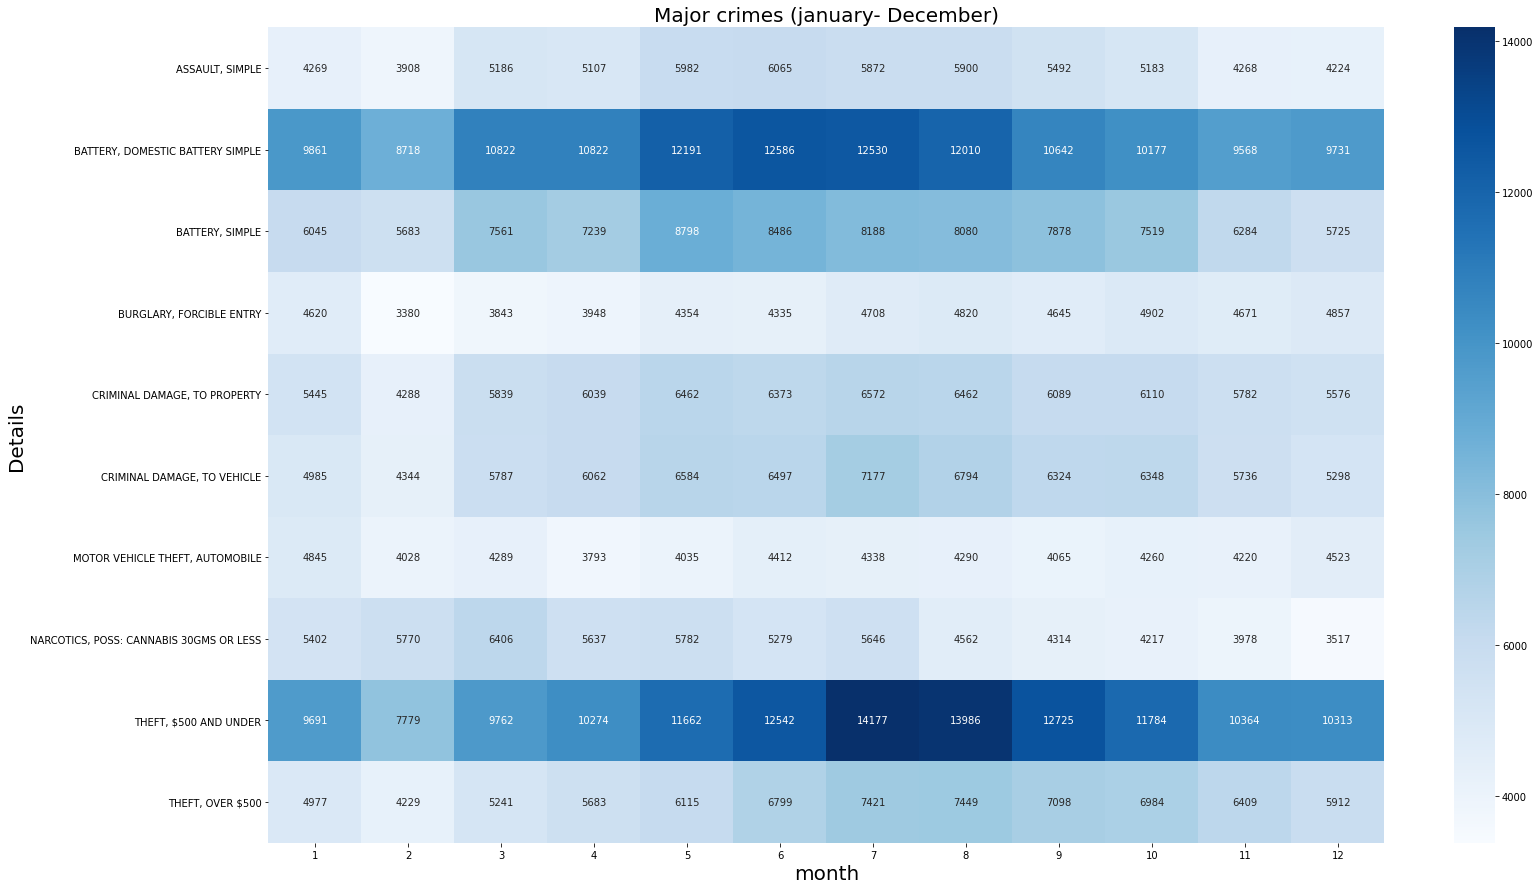

In [27]:
df2=df.groupby(['Details','month'])['Arrest'].count()

#chart Formating 
DIMS=(25,15)
fig=plt.figure(figsize=DIMS)
ax1=fig.add_subplot(111)
ax1.set_title('Major crimes (january- December)',fontsize=20)
ax1.set_xlabel('Details',fontsize=20)
ax1.set_ylabel('month',fontsize=20)

#get top 20 data
df2=pd.DataFrame(df2).reset_index()
df2=df2[df2['Details'].isin(top_crimes)]

#pivot data to 2D table and fina all na values 
df2=df2.pivot_table(index='Details',columns='month',values='Arrest')
df2.fillna(0,inplace=True)

#Create Heatmap
sns.heatmap(df2,cmap="Blues",annot=True,fmt='g')
